In [8]:
from sympy import *

init_printing()

In [9]:
α = symbols("α_{1:4}")

In [10]:
β = symbols("β_{1:4}")

In [11]:
a = symbols("a_{1:3}")

In [12]:
b = symbols("b_{1:3}")

In [13]:
k = symbols("k_{1:4}")

In [18]:
ubar = Function("u")

u

In [20]:
a, b, k, α, β = symbols("a b k α β", cls=Idx)

In [32]:
n = symbols("n", integer=True)

In [41]:
α = Idx("α", 3)

In [42]:
β = Idx("β", 3)

In [43]:
a = Idx("a", n)

In [44]:
b = Idx("b", n)

In [45]:
k = Idx("k", 3)

In [46]:
u = IndexedBase("u", shape=(3, n))

In [47]:
N = IndexedBase("N", shape=(3, 3, n, n))
r = IndexedBase("r", shape=(3, n))

In [57]:
term1 = u[k, a]

In [66]:
Λ = IndexedBase("Λ", shape=(3, n))

In [51]:
N[α, 1, a, b] * r[1, a] * u[1, b]

In [52]:
N[α, 1, a, b] * r[1, a] * u[1, b] + N[α, 2, a, b] * r[2, a] * u[2, b] + N[
    α, 3, a, b
] * r[3, a] * u[3, b]

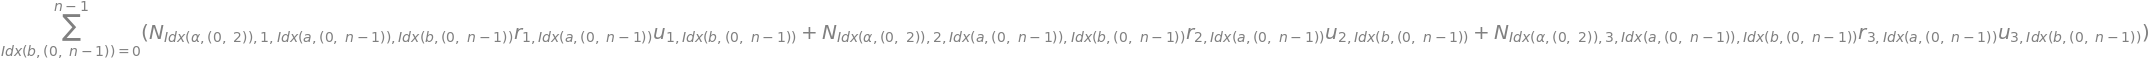

In [55]:
Sum(
    N[α, 1, a, b] * r[1, a] * u[1, b]
    + N[α, 2, a, b] * r[2, a] * u[2, b]
    + N[α, 3, a, b] * r[3, a] * u[3, b],
    b,
)

In [58]:
term2 = Sum(
    Sum(
        N[α, 1, a, b] * r[1, a] * u[1, b]
        + N[α, 2, a, b] * r[2, a] * u[2, b]
        + N[α, 3, a, b] * r[3, a] * u[3, b],
        b,
    ),
    α,
)

  2   n - 1                                                                   
 ___   ___                                                                    
 ╲     ╲                                                                      
  ╲     ╲                                                                     
  ╱     ╱   (N[α, 1, a, b]⋅r[1, a]⋅u[1, b] + N[α, 2, a, b]⋅r[2, a]⋅u[2, b] + N
 ╱     ╱                                                                      
 ‾‾‾   ‾‾‾                                                                    
α = 0 b = 0                                                                   

                             
                             
                             
                             
[α, 3, a, b]⋅r[3, a]⋅u[3, b])
                             
                             
                             

In [59]:
rhs = symbols("R")

In [61]:
eq34 = Eq(term1 + term2, rhs)

            2   n - 1                                                         
           ___   ___                                                          
           ╲     ╲                                                            
            ╲     ╲                                                           
u[k, a] +   ╱     ╱   (N[α, 1, a, b]⋅r[1, a]⋅u[1, b] + N[α, 2, a, b]⋅r[2, a]⋅u
           ╱     ╱                                                            
           ‾‾‾   ‾‾‾                                                          
          α = 0 b = 0                                                         

                                           
                                           
                                           
                                           
[2, b] + N[α, 3, a, b]⋅r[3, a]⋅u[3, b]) = R
                                           
                                           
                                           

In [64]:
eq34.expand()

            2   n - 1                                   2   n - 1             
           ___   ___                                   ___   ___              
           ╲     ╲                                     ╲     ╲                
            ╲     ╲                                     ╲     ╲               
u[k, a] +   ╱     ╱   N[α, 1, a, b]⋅r[1, a]⋅u[1, b] +   ╱     ╱   N[α, 2, a, b
           ╱     ╱                                     ╱     ╱                
           ‾‾‾   ‾‾‾                                   ‾‾‾   ‾‾‾              
          α = 0 b = 0                                 α = 0 b = 0             

                      2   n - 1                                  
                     ___   ___                                   
                     ╲     ╲                                     
                      ╲     ╲                                    
]⋅r[2, a]⋅u[2, b] +   ╱     ╱   N[α, 3, a, b]⋅r[3, a]⋅u[3, b] = R
                     ╱     ╱         

In [76]:
backsubstitutions = {Λ[k, a]: -Sum(Sum(N[k, β, a, b] * u[β, b], b), β)}

⎧            2   n - 1                      ⎫
⎪           ___   ___                       ⎪
⎪           ╲     ╲                         ⎪
⎪            ╲     ╲                        ⎪
⎨Λ[k, a]: -  ╱     ╱   N[k, β, a, b]⋅u[β, b]⎬
⎪           ╱     ╱                         ⎪
⎪           ‾‾‾   ‾‾‾                       ⎪
⎪          β = 0 b = 0                      ⎪
⎩                                           ⎭

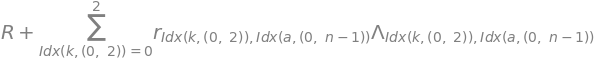

In [72]:
eq33_rhs = Sum(Λ[k, a] * r[k, a], k) + rhs